In [1]:
import pandas as pd

dataset = pd.read_csv("C:/Users/Justin/Desktop/Data Explorattion and Analysis/Powerlifting.csv")
# https://www.kaggle.com/datasets/kukuroo3/powerlifting-benchpress-weight-predict?select=X_test.csv

In [2]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

cleaning_df = dataset.dropna()
cleaning_df['Bodyweight_lb'] = round(cleaning_df.BodyweightKg * 2.2)
cleaning_df['MaxSquat_lb'] = round(cleaning_df.BestSquatKg * 2.2)
cleaning_df['MaxDeadlift_lb'] = round(cleaning_df.BestDeadliftKg * 2.2)
cleaning_df['Sex_Id'] = cleaning_df['Sex'].replace(('M', 'F'), (0,1))

lift_df = cleaning_df.drop(columns=['Sex', 'BodyweightKg', 'BestSquatKg', 'BestDeadliftKg'])
lift_df = lift_df.astype({"Bodyweight_lb":"int","Age":"int"})
lift_df["MaxSquat_lb"] = lift_df["MaxSquat_lb"].apply(np.int64)
lift_df["MaxDeadlift_lb"] = lift_df["MaxDeadlift_lb"].apply(np.int64)

lift_df.head()

,playerId,Name,Equipment,Age,Bodyweight_lb,MaxSquat_lb,MaxDeadlift_lb,Sex_Id
0,2308.0,Peter Neeves,Wraps,30,198,394,424,0
1,22404.0,Josh Padilla,Raw,27,165,275,363,0
2,23397.0,Luke Dreier,Wraps,30,270,638,698,0
3,25058.0,Jacob New,Raw,20,194,413,528,0
4,2664.0,Jesse Burdick,Wraps,30,268,517,605,0


# Describe what the 5 variables mean in the dataset (Chapter 1).

The variables that will be used in this analysis are Sex_Id, Age, Bodyweight_lb, MaxSquat_lb, and MaxDeadlift_lb. Sex_Id is the gender of the athlete (0 = Male, 1 = Female), Age is for how old the individual was at the time of competition, and BodyweightKg was the weight of the athlete during that time in pounds. MaxSquat_lb and MaxDeadlift_lb are the amount of weight lifted (in pounds) for the squat and deadlift events. 

# Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2)

Text(0, 0.5, 'Count')

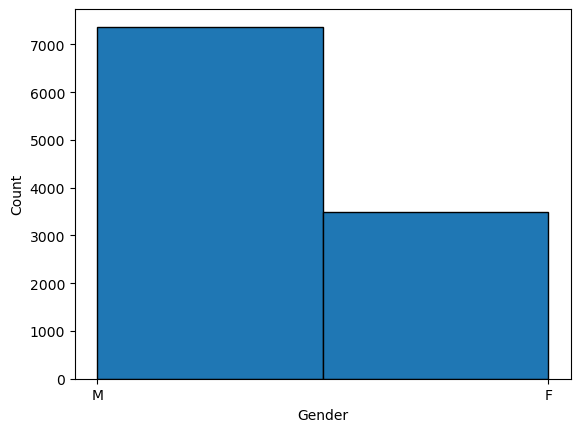

In [3]:
from matplotlib import pyplot as plt

plt.hist(cleaning_df.Sex, bins = 2, edgecolor='black')
plt.xlabel("Gender")
plt.ylabel("Count")
# This variable has only 2 possible options of male and female and there
# are no outliers. The distribution is not normal and skewed to the right.

Text(0, 0.5, 'Count')

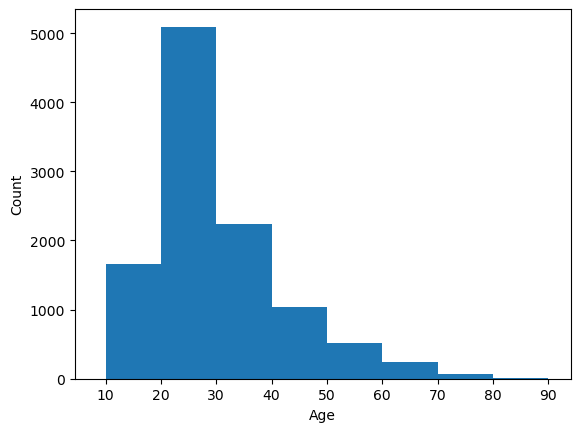

In [4]:
bins = (8.5, 10, 20, 30, 40, 50, 60, 70, 80, 90)
plt.hist(lift_df.Age, bins = bins)
plt.xlabel("Age")
plt.ylabel("Count")
# This histogram is not normal and skewed to the right. 
# No outliers are shown and it appears to have one mode.

Text(0, 0.5, 'Count')

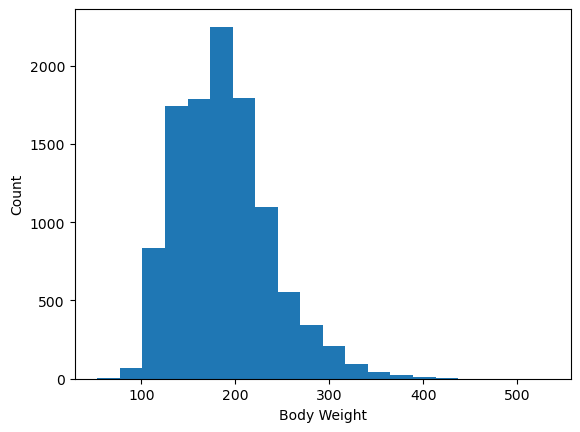

In [5]:
plt.hist(lift_df.Bodyweight_lb, bins = 20)
plt.xlabel("Body Weight")
plt.ylabel("Count")
# This histogram is not normal and skewed to the right. 
# No outliers are shown and it appears to have one mode.

Text(0, 0.5, 'Count')

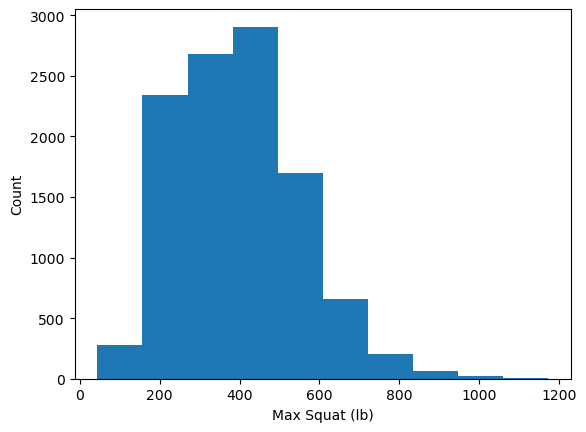

In [6]:
plt.hist(lift_df.MaxSquat_lb, bins = 10)
plt.xlabel("Max Squat (lb)")
plt.ylabel("Count")
# Outside of a slight skew to the right, this histogram is relatively normal
# No outliers are shown and it appears to have one mode.

Text(0, 0.5, 'Count')

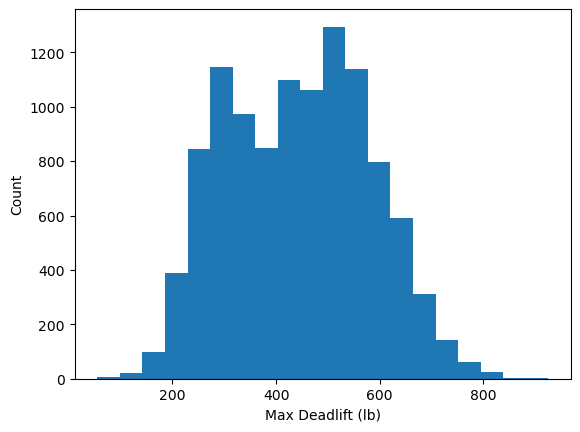

In [7]:
plt.hist(lift_df.MaxDeadlift_lb, bins = 20)
plt.xlabel("Max Deadlift (lb)")
plt.ylabel("Count")
# this histogram has 2 modes and can be considered normal.
# No outliers are observed

# Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [8]:
from statistics import mean, mode

In [9]:
## Sex
### Mean
sex_mean = lift_df.Sex_Id.mean()

### Mode
sex_mode = lift_df.Sex_Id.mode()
sex_mode = sex_mode[0]

### Spread- 
sex_var = lift_df.Sex_Id.var()
sex_var = round(sex_var,3)

### Tails
#### The 2 values are fairly heavy, with one being approximately half of the other.

print(f'The mean is {sex_mean}, The mode is {sex_mode}, and the spread is {sex_var}')

The mean is 0.3210502072777522, The mode is 0, and the spread is 0.218


In [10]:
## Age
### Mean
age_mean =  lift_df.Age.mean()
age_mean = round(age_mean,0)

### Mode
age_mode =  lift_df.Age.mode()
age_mode = age_mode[0]

### Spread- 
age_var = lift_df.Age.var()
age_var = round(age_var,3)

### Tails
#### The Age distribution has a heavy left tail and a longer/gradual tail on the right.

print(f'The mean is {age_mean}, The mode is {age_mode}, and the spread is {age_var}')

The mean is 30.0, The mode is 22, and the spread is 135.233


In [11]:
## Bodyweight
### Mean
body_mean =  lift_df.Bodyweight_lb.mean()
body_mean = round(body_mean,0)

### Mode
body_mode =  lift_df.Bodyweight_lb.mode()
body_mode = body_mode[0]

### Spread- 
body_var = lift_df.Bodyweight_lb.var()
body_var = round(body_var,3)

### Tails

#### The body weight distribution has a steep drop off followed by a small left tail and a longer/slightly gradual tail on the right.

print(f'The mean is {body_mean}, The mode is {body_mode}, and the spread is {body_var}')

The mean is 188.0, The mode is 180, and the spread is 2507.891


In [12]:
## Squat 
### Mean
squat_mean =  lift_df.MaxSquat_lb.mean()
squat_mean = round(squat_mean,0)

### Mode
squat_mode =  lift_df.MaxSquat_lb.mode()
squat_mode = squat_mode[0]

### Spread- 
squat_var = lift_df.MaxSquat_lb.var()
squat_var = round(squat_var,3)

### Tails
#### The squat weight distribution has a steep drop off followed by a small left tail and a gradual tail on the right.

print(f'The mean is {squat_mean}, The mode is {squat_mode}, and the spread is {squat_var}')

The mean is 395.0, The mode is 440, and the spread is 23356.697


In [13]:
## Deadlift 

### Mean
d_l_mean =  lift_df.MaxDeadlift_lb.mean()
d_l_mean = round(d_l_mean,0)

### Mode
d_l_mode =  lift_df.MaxDeadlift_lb.mode()
d_l_mode = d_l_mode[0]

### Spread- 
d_l_var = lift_df.MaxDeadlift_lb.var()
d_l_var = round(d_l_var,3)

### Tails
#### The dead lift weight distribution short yet gradual decreasing tails on both ends.

print(f'The mean is {d_l_mean}, The mode is {d_l_mode}, and the spread is {d_l_var}')

The mean is 442.0, The mode is 501, and the spread is 19059.632


# Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3)

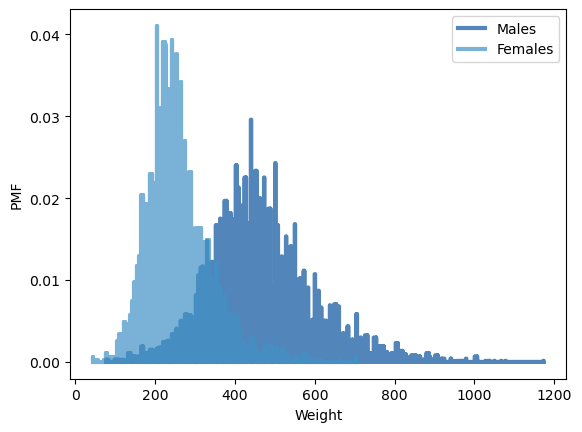

In [14]:
import thinkstats2
import thinkplot

m_squat = lift_df[lift_df.Sex_Id == 0]
f_squat = lift_df[lift_df.Sex_Id == 1]

male_pmf = thinkstats2.Pmf(m_squat.MaxSquat_lb, label = 'Males')
female_pmf = thinkstats2.Pmf(f_squat.MaxSquat_lb, label = 'Females')

thinkplot.PrePlot(2)
thinkplot.Pmfs([male_pmf, female_pmf])
thinkplot.Config(xlabel="Weight", ylabel="PMF", legend = True, loc = 'upper right')

# Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4)

0.4636573007830493

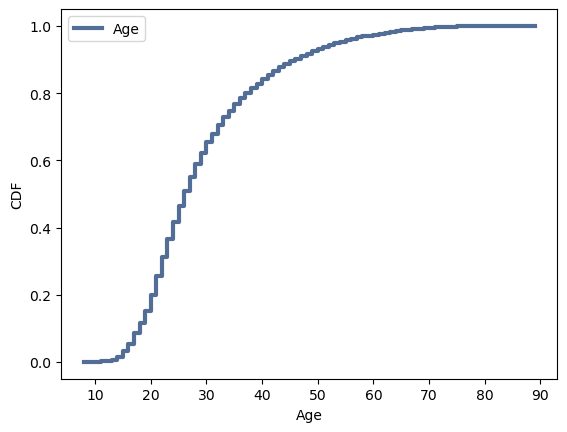

In [32]:
age_cdf = thinkstats2.Cdf(lift_df.Age, label = 'Age')

thinkplot.Cdf(age_cdf)
thinkplot.Config(xlabel="Age", ylabel="CDF")

age_cdf.Prob(25)

# Looking at the CDF lets me know that the common ages are approximately between 20 and 40. When asking the question if a 
# majority of competitors are under 26 years of age, this distribution allows me to see that for ages 26 and less, the 
# probability is close to 50% (actual 46%) meaning that no, a majority of competitors are not under 26. 

# Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

In [16]:
import numpy as np

def MakeNormalModel(body_wt):

    cdf = thinkstats2.Cdf(body_wt, label="body_wts")

    mean, var = thinkstats2.TrimmedMeanVar(body_wt)
    std = np.sqrt(var)
    print("n, mean, std", len(body_wt), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
    thinkplot.Cdf(cdf)

n, mean, std 10855 186.66923583043518 46.268836690552234


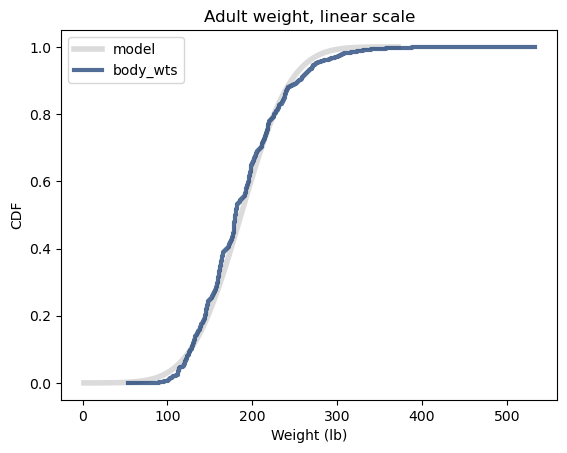

In [17]:
MakeNormalModel(lift_df.Bodyweight_lb)
thinkplot.Config(
    title="Adult weight, linear scale",
    xlabel="Weight (lb)",
    ylabel="CDF",
    loc="upper left",
)

# This distribution applies to the data set because it highlights that the body weights on a linear scale are normally
# distributed compared to the model. This lets me know that any values near the mean can be concluded that they occur
# more frequently than values further away from the mean. 

# Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

In [18]:
# Covariance
np.cov(lift_df.Bodyweight_lb, lift_df.MaxSquat_lb)

# Pearsons Correlation
lift_df.Bodyweight_lb.corr(lift_df.MaxSquat_lb)

0.6576274226217048

In [19]:
# Pearsons Correlation
lift_df.Bodyweight_lb.corr(lift_df.MaxSquat_lb)

0.6576274226217048

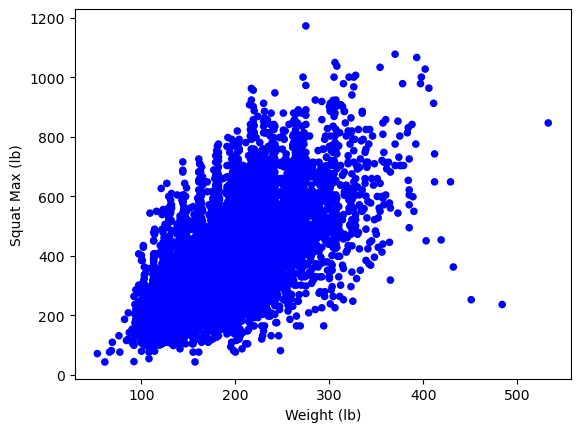

In [20]:
import scipy.stats

thinkplot.Scatter(lift_df.Bodyweight_lb, lift_df.MaxSquat_lb, alpha=1.0)
thinkplot.Config(xlabel='Weight (lb)',
                 ylabel='Squat Max (lb)')

# Looking at the scatter plot it is evident that the plot is linear and that there is a correlation. As the weight 
# increases often does the amount of weight the individual squatted during the competition. Additionally, in this situation, 
# correlation for the most part does result in causation. With increased body weight, the body is able to bear more weight on 
# the legs as it is already accustomed to carrying a heavier load on a daily basis (the persons body weight).

In [21]:
# Covariance
np.cov(lift_df.MaxSquat_lb, lift_df.Age)

array([[23356.69743004,   -58.73428016],
       [  -58.73428016,   135.23250666]])

In [22]:
# Pearsons Correlation
lift_df.MaxSquat_lb.corr(lift_df.Age)

-0.0330480153717141

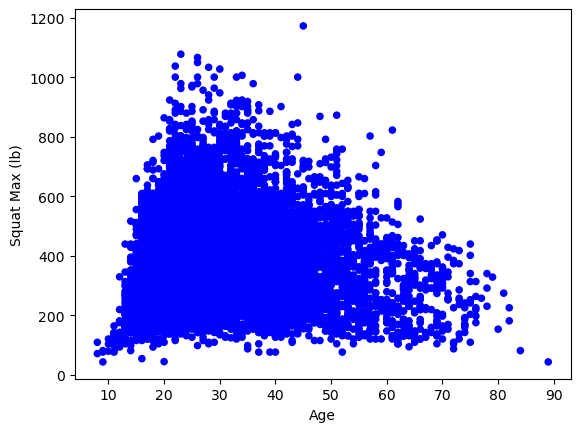

In [23]:
thinkplot.Scatter(lift_df.Age, lift_df.MaxSquat_lb, alpha=1.0)
thinkplot.Config(xlabel='Age',
                 ylabel='Squat Max (lb)')

# This model suggests that there is essentially no correlation between 
# Age and Max Squat. 
# The plot does not resemble a linear model.
# Causation is not applicable being that for the most part in the later ages
# Squat weights appear to stay in a range of 100-300 lbs.

# Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [24]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [25]:
hypoth_select = lift_df[(lift_df['Sex_Id'] == 0)]
under_27 = hypoth_select[(hypoth_select['Age'] <= 26)]

In [26]:
data = under_27.MaxSquat_lb.values, under_27.Bodyweight_lb.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

# For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [27]:
import statsmodels.formula.api as smf

formula = 'MaxSquat_lb ~ Sex_Id + Age + Bodyweight_lb'
results = smf.ols(formula, data=lift_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MaxSquat_lb   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     4585.
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:51:16   Log-Likelihood:                -65552.
No. Observations:               10855   AIC:                         1.311e+05
Df Residuals:                   10851   BIC:                         1.311e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       194.6885      5.084     38.295      0.000     184.723     204.654
Sex_Id         -129.4014      2.419    -53.502      0.000    -134.142    -124.660
Age              -0.8828      0.085    -10.429      0.000      -1.049      -0.717
Bodyweight_lb     1.4269      0.023     62.984      0.000       1.383       1.471
==============================================================================
Omnibus:                      742.966   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1628.340
Skew:                           0.448   Prob(JB):                         0.00
Kurtosis:                       4.672   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
columns = ['Sex_Id', 'Age', 'Bodyweight_lb']
new = pd.DataFrame([[0, 26, 200]], columns=columns)
results.predict(new)

0    457.122651
dtype: float64